# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

**I want to find out which asset class is safer against inflation. This is done by comparing the Treasury Bonds and Equity market (SP500) datasets against historical CPI (Customer Price Index).**


Data source locations:

- Inflation: https://data.nasdaq.com/data/RATEINF/CPI_USA-consumer-price-index-usa (need to sign up for an account to download)
- T-Bond: [Damodaran Online: Historical Returns on Stocks, Bonds and Bills](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)
- S&P 500: [ONLINE DATA ROBERT SHILLER](http://www.econ.yale.edu/~shiller/data.htm)

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
# Imports and config setup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import MonthEnd, YearEnd, YearBegin
from IPython.display import display
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from styles import style as style_df, format_row_wise, round_or_null, percent_or_null
import os
import requests

import configparser
import quandl
config = configparser.ConfigParser()
config.read('config.cfg')

['config.cfg']

#### **Dataset 1: Inflation Data**

Type: **Data.NASDAQ API**

Method: **The data was gathered via API from [data.nasdaq.com](https://data.nasdaq.com/data/RATEINF/CPI_USA-consumer-price-index-usa) (need to sign up for an account to download).**

Dataset variables:

* Date: Date
* Value: CPI value

In [2]:
# Download inflation data

INFLATION_DATA = 'data/inflation.csv'

if os.path.exists(INFLATION_DATA):
    inf = pd.read_csv(INFLATION_DATA)
    inf['Date'] = pd.to_datetime(inf['Date'])
    inf = inf.set_index('Date')
else:
    inf = quandl.get("RATEINF/CPI_USA", authtoken=config['DATA.NASDAQ']['AUTH_TOKEN'])
    inf.to_csv(INFLATION_DATA)

#### Dataset 2: T. Bonds

Type: **Excel file**

Method: **The data was downloaded from [Damodaran Online: Historical Returns on Stocks, Bonds and Bills](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)**

Dataset variables:

* Year: Year of the bond return
* US T. Bond: Bond Return
* 3-month T.Bill: 3-month T.Bill return

In [3]:
# Download inflation data
TBOND_DATA = 'data/histretSP.xls'

tbond = pd.read_excel(TBOND_DATA,
                      sheet_name="Returns by year",
                      skiprows=list(range(0,17)))

#### Dataset 3: S&P 500

Type: **Excel file**

Method: **The data was downloaded from [Damodaran Online: Historical Returns on Stocks, Bonds and Bills](https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSP.html)**

Dataset variables:

* Year: Year of the bond return
* US T. Bond: Bond Return
* 3-month T.Bill: 3-month T.Bill return

In [4]:
SP500_DATA = 'data/sp500.xls'
sp500 = pd.read_excel(SP500_DATA,
                      sheet_name="Data",
                      skiprows=list(range(0,7))
                      )

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [5]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [6]:
# Inspecting the dataframe visually
display(inf.head(5))
display(tbond.head(5))
display(sp500.head(5))

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,105.482077,6.176878,105.482077,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,103.739896,5.993861,104.239384,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,104.723971,5.906341,105.722762,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,111.755968,6.130074,113.337538,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,117.249795,6.272623,119.439229,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [7]:
# Inspecting the dataframe programmatically
inf.info()
tbond.info()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1322 entries, 1913-01-31 to 2023-02-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1322 non-null   float64
dtypes: float64(1)
memory usage: 20.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill

Issue and justification: **We need annual data that are recorded at the last day of each year, but the data in `inf` are daily and in `sp500` are monthly. The data type should also be changed to datetime rather than float or object.**

### Quality Issue 2:

In [8]:
# Inspecting the dataframe visually
display(tbond.tail(15))
display(sp500.tail(5))

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
93,2021,0.284689,0.000450,-0.044160,0.009334,0.189143,-0.037544,761710.833617,2098.027709,8526.950827,...,0.328849,0.275354,0.051322,0.071,0.199522,-0.065873,-0.107526,-0.057578,0.110311,-0.101349
94,2022,-0.180090,0.020248,-0.178282,-0.144883,0.073033,0.005494,624534.546333,2140.508136,7006.751407,...,-0.001808,-0.035207,0.050613,0.0642,-0.229552,-0.041301,-0.227854,-0.19647,0.0083,-0.055164
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Arithmetic Average Historical Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Risk Premium,...,NaN,NaN,NaN,Arithmetic Average Annual Real Return,NaN,NaN,NaN,NaN,NaN,NaN
97,1928-2022,0.115065,0.033202,0.048690,0.069579,0.044157,0.064836,NaN,NaN,Stocks - T.Bills,...,NaN,NaN,NaN,NaN,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
98,1973-2022,0.117317,0.043983,0.065890,0.087712,0.055352,0.095566,NaN,NaN,0.081863,...,NaN,NaN,NaN,1928-2022,0.082703,0.003059,0.018803,0.039114,0.012833,0.032111
99,2013-2022,0.135895,0.007815,0.005125,0.038144,0.076750,0.020283,NaN,NaN,0.073334,...,NaN,NaN,NaN,1973-2022,0.075648,0.003983,0.026345,0.047371,0.014958,0.050968
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128079,...,NaN,NaN,NaN,2013-2022,0.107794,-0.017591,-0.019068,0.01289,0.049116,-0.005333
101,Geometric Average Historical Return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,1928-2022,0.096360,0.032774,0.045747,0.066760,0.042302,0.048342,NaN,NaN,Stocks - T.Bills,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
1822,2022.11,3917.488571,66.386102,NaN,297.711,2022.875000,3.89,3896.441237,66.029432,2.530497e+06,...,28.455474,NaN,30.858973,NaN,0.022284,1.025710,40.026835,NaN,NaN,NaN
1823,2022.12,3912.380952,66.920000,NaN,296.797,2022.958333,3.62,3903.344685,66.765438,2.538593e+06,...,28.460682,NaN,30.887242,NaN,0.024939,1.010538,41.182342,NaN,NaN,NaN
1824,2023.01,3960.6565,NaN,NaN,296.34,2023.041667,3.53,3957.602542,NaN,2.573881e+06,...,28.810370,NaN,31.245137,NaN,0.024952,1.014718,41.680486,NaN,NaN,NaN
1825,2023.02,4179.76,NaN,NaN,296.1115,2023.125000,3.39,4179.760000,NaN,2.718364e+06,...,30.378785,NaN,32.923359,NaN,0.023644,NaN,42.326590,NaN,NaN,NaN
1826,NaN,Feb price is Feb 2nd close,NaN,NaN,Jan/Feb CPI estimated,NaN,Feb GS10 is Feb 2nd value,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Inspecting the dataframe programmatically
tbond.info()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

Issue and justification: **In the `tbond` dataset, rows line 95 and below are invalid. In the `sp500` dataset, the last row is invalid.**

### Quality Issue 3:

In [10]:
# Inspecting the dataframe visually
sp500[['Date', 'P', 'D', 'Returns']].head(5)

,Date,P,D,Returns
0,1871.01,4.44,0.26,1.004177
1,1871.02,4.5,0.26,1.004180
2,1871.03,4.61,0.26,1.004183
3,1871.04,4.74,0.26,1.004185
4,1871.05,4.86,0.26,1.004188


In [11]:
# Inspecting the dataframe programmatically
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1826 non-null   float64
 1   P              1827 non-null   object 
 2   D              1824 non-null   float64
 3   E              1821 non-null   float64
 4   CPI            1827 non-null   object 
 5   Fraction       1826 non-null   float64
 6   Rate GS10      1827 non-null   object 
 7   Price          1826 non-null   float64
 8   Dividend       1824 non-null   float64
 9   Price.1        1826 non-null   float64
 10  Earnings       1821 non-null   float64
 11  Earnings.1     1821 non-null   float64
 12  CAPE           1706 non-null   float64
 13  Unnamed: 13    0 non-null      float64
 14  TR CAPE        1706 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Yield          1706 non-null   float64
 17  Returns        1825 non-null   float64
 18  Returns.

Issue and justification: **In the S&P 500 dataset, returns should be calculated annually instead of monthly.**

### Tidiness Issue 1:

In [12]:
# Inspecting the dataframe visually
display(tbond.head(5))
display(sp500.head(5))

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,105.482077,6.176878,105.482077,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,103.739896,5.993861,104.239384,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,104.723971,5.906341,105.722762,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,111.755968,6.130074,113.337538,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,117.249795,6.272623,119.439229,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [13]:
# Inspecting the dataframe programmatically
tbond.info()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill4                95 non-null     float64
 9   US T. Bond5                    104 non-null    object 
 10   Baa Corporate Bond2           104 non-null    object 
 11  Real Estate2                   100 non-null    object 
 12  Gold2                          99 non-null     obj

Issue and justification: **Many columns are not relevant to our analysis. We only need the `Year` and `US T. Bond` columns from the `tbond` dataset and `Date`, `P` (price), and `D` (dividend) from the `sp500` dataset.**


Note for reviewer / content creator:

Deleting columns can address both data quality and data tidiness issues, depending on the context and the reason for removing the column.

1. Data Quality: If a column contains incorrect, inconsistent, or irrelevant information that cannot be corrected or if it has a high percentage of missing values, deleting the column can improve the overall data quality. Data quality refers to the accuracy, completeness, consistency, and validity of the data.
2. Data Tidiness: If a column is redundant or not related to the analysis being performed, removing it can help make the dataset more concise and easier to work with. Data tidiness refers to the structure and organization of the data, ensuring that each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

I deleted the above columns since they are not relevant to the analysis and not because there are incorrect information. Hence, I categorize this issue as a Data Tidiness issue.

References for the above:

1. Hadley Wickham's paper on Tidy Data: Wickham, H. (2014). Tidy data. Journal of Statistical Software, 59(10). URL: https://www.jstatsoft.org/article/view/v059i10
In this paper, Hadley Wickham defines and explains the principles of tidy data, which help to structure and organize data for easier analysis.
2. Data Quality: The Accuracy Dimension by Jack E. Olson: Olson, J. E. (2003). Data Quality: The Accuracy Dimension. Morgan Kaufmann.
This book delves into various aspects of data quality, including accuracy, completeness, consistency, and validity. It provides practical guidance on identifying and addressing data quality issues.

### Tidiness Issue 2: 

In [14]:
# Inspecting the dataframe visually

display(inf.head(5))
display(tbond.head(5))
display(sp500.head(5))

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.0308,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.0316,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.0455,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.0231,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.0107,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646


,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.26,0.4,12.464061,1871.041667,5.32,105.482077,6.176878,105.482077,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.26,0.4,12.844641,1871.125000,5.323333,103.739896,5.993861,104.239384,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.26,0.4,13.034972,1871.208333,5.326667,104.723971,5.906341,105.722762,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.26,0.4,12.559226,1871.291667,5.33,111.755968,6.130074,113.337538,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.26,0.4,12.273812,1871.375000,5.333333,117.249795,6.272623,119.439229,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150


In [15]:
# Inspecting the dataframe programmatically
inf.info()
tbond.info()
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1322 entries, 1913-01-31 to 2023-02-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1322 non-null   float64
dtypes: float64(1)
memory usage: 20.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           105 non-null    object 
 1   S&P 500 (includes dividends)   101 non-null    float64
 2   3-month T.Bill                 101 non-null    float64
 3   US T. Bond                     101 non-null    float64
 4    Baa Corporate Bond            101 non-null    float64
 5   Real Estate                    101 non-null    float64
 6   Gold*                          101 non-null    float64
 7   S&P 500 (includes dividends)3  95 non-null     float64
 8   3-month T.Bill

Issue and justification: **All three datasets should be merged using their years (get years from the Date column) since a single observation with the date as its index is spread into all these three datasets.**

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [16]:
# Make copies of the datasets to ensure the raw dataframes 
# are not impacted

inf_clean = inf.copy()
tbond_clean = tbond.copy()
sp500_clean = sp500.copy()

In [17]:
tbond_clean

,Year,S&P 500 (includes dividends),3-month T.Bill,US T. Bond,Baa Corporate Bond,Real Estate,Gold*,S&P 500 (includes dividends)3,3-month T.Bill4,US T. Bond5,...,Stocks - Bonds,Stocks - Baa Corp Bond,Historical risk premium,Inflation Rate,S&P 500 (includes dividends)2,3-month T. Bill (Real),!0-year T.Bonds,Baa Corp Bonds,Real Estate3,Gold
0,1928,0.438112,0.030800,0.008355,0.032196,0.014911,0.000969,143.811155,103.080000,100.835471,...,0.429757,0.405916,NaN,-0.011561,0.454932,0.042856,0.020148,0.044268,0.026781,0.012676
1,1929,-0.082979,0.031600,0.042038,0.030179,-0.020568,-0.001452,131.877782,106.337328,105.074397,...,-0.125018,-0.113158,NaN,0.005848,-0.088311,0.025602,0.03598,0.024189,-0.026262,-0.007258
2,1930,-0.251236,0.045500,0.045409,0.005398,-0.043000,0.000969,98.745288,111.175676,109.845753,...,-0.296646,-0.256634,NaN,-0.063953,-0.200079,0.116932,0.116835,0.07409,0.022385,0.069359
3,1931,-0.438375,0.023100,-0.025589,-0.156808,-0.081505,-0.173850,55.457774,113.743835,107.034958,...,-0.412787,-0.281568,NaN,-0.093168,-0.380674,0.128213,0.074522,-0.070178,0.012861,-0.088971
4,1932,-0.086424,0.010700,0.087903,0.235896,-0.104664,0.212778,50.664911,114.960894,116.44366,...,-0.174327,-0.322320,NaN,-0.10274,0.018184,0.126429,0.212472,0.377411,-0.002145,0.351646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1973-2022,0.102442,0.043425,0.061202,0.084345,0.053785,0.069066,NaN,NaN,0.063586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,2013-2022,0.124379,0.007780,0.001154,0.034485,0.075892,0.009560,NaN,NaN,0.059017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.116598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Tidiness Issue 1: Many columns are not relevant to our analysis. We only need the `Year` and `US T. Bond` columns from the `tbond` dataset and `Date`, `P` (price), and `D` (dividend) from the `sp500` dataset.**

In [18]:
# Correct the columns in the `inf` dataset
inf_clean = inf_clean.reset_index()
inf_clean = inf_clean.rename(columns={'Date': 'date', 'Value': 'value'})

# Get only relevant columns from tbond
tbond_clean = tbond_clean[['Year', 'US T. Bond', '3-month T.Bill']]

# While doing that, rename the columns
tbond_clean = tbond_clean.rename(columns={'Year': 'date', 'US T. Bond': 'tbond', '3-month T.Bill': 'tbill'})

# Get only the needed columns from the `sp500` dataset and rename them 
sp500_clean = sp500_clean[['Date', 'P', 'D']]
sp500_clean = sp500_clean.rename(columns={'Date': 'date', 'P': 'price', 'D': 'dividend'})

In [19]:
# Validate the cleaning was successful
assert(all(inf_clean.columns == ['date', 'value']))
assert(all(tbond_clean.columns == ['date', 'tbond', 'tbill']))
assert(all(sp500_clean.columns == ['date', 'price', 'dividend']))

Justification: **I simply used selectors to retrieve the appropriate columns and pd.DataFrame.rename() to rename the columns. As shown by the assertions, we have correctly extracted and renamed columns.**

### **Quality Issue 2: In the `tbond` dataset, rows line 95 and below are invalid. In the `sp500` dataset, the last row is invalid.**

In [20]:
# Remove invalid rows in the tbond dataset
eof_id = tbond_clean[tbond_clean['date'] == 'Arithmetic Average Historical Return'].index[0]
tbond_clean = tbond_clean.iloc[0:eof_id].dropna()

# Remove the last row in the sp500 dataset
sp500_clean = sp500_clean.iloc[:-1, :]

In [21]:
#Validate the cleaning was successful
display(tbond_clean.tail(1))
display(sp500_clean.tail(5))

,date,tbond,tbill
94,2022,-0.178282,0.020248


,date,price,dividend
1821,2022.10,3726.050952,65.852204
1822,2022.11,3917.488571,66.386102
1823,2022.12,3912.380952,66.920000
1824,2023.01,3960.6565,NaN
1825,2023.02,4179.76,NaN


Justification: **For `tbond` data: Rather than directly get line 95 and below, I find the row where the date is 'Arithmetic Average Historical Return' and then removed all rows starting from it. I have also removed all rows that contain None. For `sp500` data, I just removed the last row. The final last row has non-empty date field which means it is correct.**

### **Quality Issue 1:  We need annual data that are recorded at the last day of each year, but the data in `inf` are daily and in `sp500` are monthly. The data type should also be changed to datetime rather than float or object.**

In [22]:
# Get year-on-year CPI changes as a measure of inflation.
inf_clean['date'] = pd.to_datetime(inf_clean['date'])
inf_clean.set_index('date', inplace=True)
inf_clean['last_year_value'] = inf_clean.shift(12)['value']
inf_clean['actual_inflation'] = inf_clean['value'] / inf_clean['last_year_value'] - 1
inf_clean = inf_clean[['actual_inflation']]

# Correct the date column in the `tbond` dataset:
tbond_clean['date'] = pd.to_datetime(tbond_clean['date'], format='%Y') + YearEnd(1)
tbond_clean = tbond_clean.set_index('date')

# Correct the date column in the `sp500` dataset
sp500_clean['date'] = sp500_clean['date'].apply(lambda x: '{0:.2f}'.format(x))
sp500_clean['date'] = sp500_clean['date'].astype(str)
sp500_clean['price'] = sp500_clean['price'].astype(float)
sp500_clean['date'] = pd.to_datetime(sp500_clean['date'], format="%Y.%m")
sp500_clean['date'] = sp500_clean['date'] + MonthEnd(1)
sp500_clean.set_index('date', inplace=True)

In [23]:
inf_clean.tail(10)

,actual_inflation
date,
2022-05-31,0.085815
2022-06-30,0.090598
2022-07-31,0.085248
2022-08-31,0.082627
2022-09-30,0.082017
2022-10-31,0.077454
2022-11-30,0.071103
2022-12-31,0.064544
2023-01-31,0.064101


In [24]:
# Validate the cleaning was successful

display(inf_clean.head(5))
display(tbond_clean.head(5))
display(sp500_clean.head(5))

,actual_inflation
date,
1913-01-31,NaN
1913-02-28,NaN
1913-03-31,NaN
1913-04-30,NaN
1913-05-31,NaN


,tbond,tbill
date,,
1928-12-31,0.008355,0.0308
1929-12-31,0.042038,0.0316
1930-12-31,0.045409,0.0455
1931-12-31,-0.025589,0.0231
1932-12-31,0.087903,0.0107


,price,dividend
date,,
1871-01-31,4.44,0.26
1871-02-28,4.50,0.26
1871-03-31,4.61,0.26
1871-04-30,4.74,0.26
1871-05-31,4.86,0.26


Justification: **All three datasets now have the correct dates. Notice how they each have one year distance from each other except for the S&P 500 dataset - we will correct them next.**

### **Quality Issue 3: In the S&P 500 dataset, returns should be calculated annually instead of monthly.**

In [25]:
sp500

,Date,P,D,E,CPI,Fraction,Rate GS10,Price,Dividend,Price.1,...,CAPE,Unnamed: 13,TR CAPE,Unnamed: 15,Yield,Returns,Returns.1,Real Return,Real Return.1,Returns.2
0,1871.01,4.44,0.260000,0.4,12.464061,1871.041667,5.32,105.482077,6.176878,1.054821e+02,...,NaN,NaN,NaN,NaN,NaN,1.004177,1.000000,0.130609,0.092504,0.038106
1,1871.02,4.5,0.260000,0.4,12.844641,1871.125000,5.323333,103.739896,5.993861,1.042394e+02,...,NaN,NaN,NaN,NaN,NaN,1.004180,0.974424,0.130858,0.094635,0.036224
2,1871.03,4.61,0.260000,0.4,13.034972,1871.208333,5.326667,104.723971,5.906341,1.057228e+02,...,NaN,NaN,NaN,NaN,NaN,1.004183,0.964209,0.130951,0.096186,0.034765
3,1871.04,4.74,0.260000,0.4,12.559226,1871.291667,5.33,111.755968,6.130074,1.133375e+02,...,NaN,NaN,NaN,NaN,NaN,1.004185,1.004919,0.122056,0.090972,0.031084
4,1871.05,4.86,0.260000,0.4,12.273812,1871.375000,5.333333,117.249795,6.272623,1.194392e+02,...,NaN,NaN,NaN,NaN,NaN,1.004188,1.032591,0.122638,0.089488,0.033150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2022.11,3917.488571,66.386102,NaN,297.711,2022.875000,3.89,3896.441237,66.029432,2.530497e+06,...,28.455474,NaN,30.858973,NaN,0.022284,1.025710,40.026835,NaN,NaN,NaN
1823,2022.12,3912.380952,66.920000,NaN,296.797,2022.958333,3.62,3903.344685,66.765438,2.538593e+06,...,28.460682,NaN,30.887242,NaN,0.024939,1.010538,41.182342,NaN,NaN,NaN
1824,2023.01,3960.6565,NaN,NaN,296.34,2023.041667,3.53,3957.602542,NaN,2.573881e+06,...,28.810370,NaN,31.245137,NaN,0.024952,1.014718,41.680486,NaN,NaN,NaN
1825,2023.02,4179.76,NaN,NaN,296.1115,2023.125000,3.39,4179.760000,NaN,2.718364e+06,...,30.378785,NaN,32.923359,NaN,0.023644,NaN,42.326590,NaN,NaN,NaN


In [26]:
# Calculate year-on-year changes in the S&P500 dataset.

def get_earnings_plus_dividends_yoy(df):
    g = df.groupby(pd.Grouper(freq="Y"))
    dividend = g.dividend.mean()
    firstp = g.price.last().shift(1)
    lastp = g.price.last()
    lastp_div = lastp + dividend
    comb = firstp.to_frame(name='first') \
           .join(lastp.to_frame(name='last')) \
           .join(dividend.to_frame(name='dividend')) \
           .join(lastp_div.to_frame(name='last_plus_dividend'))
    comb['yoy_change'] = (comb['last_plus_dividend'] / comb['first']) - 1
    return comb
sp500_clean = get_earnings_plus_dividends_yoy(sp500_clean)
sp500_clean = sp500_clean[sp500_clean.index.year >= inf_clean.index[0].year]

In [27]:
# Validate the cleaning was successful
sp500_clean.head(5)

,first,last,dividend,last_plus_dividend,yoy_change
date,,,,,
1913-12-31,9.38,8.04,0.480000,8.520000,-0.091684
1914-12-31,8.04,7.35,0.447500,7.797500,-0.030162
1915-12-31,7.35,9.48,0.425417,9.905417,0.347676
1916-12-31,9.48,9.80,0.500417,10.300417,0.086542
1917-12-31,9.80,6.80,0.630417,7.430417,-0.241794


Justification: **The dates for the `sp500` dataset are now correct and the year-on-year changes as well.**

### **Tidiness Issue 2: All three datasets should be merged using their years (get years from the Date column) since a single observation with the date as its index is spread into all these three datasets.**

In [28]:
# Merge the tables

combined1 = pd.merge(inf_clean, tbond_clean, left_on='date', right_on='date', how='left')
combined1 = combined1[['actual_inflation', 'tbond', 'tbill']]

combined2 = pd.merge(combined1, sp500_clean, left_on='date', right_on='date', how='left')
combined2 = combined2.rename(columns={'yoy_change': 'sp500'})
combined2 = combined2[['actual_inflation', 'tbond', 'tbill', 'sp500']]

# Remove rows with empty values
combined2 = combined2.dropna()

In [29]:
# Validate the cleaning was successful
combined2

,actual_inflation,tbond,tbill,sp500
date,,,,
1928-12-31,-0.011561,0.008355,0.030800,0.372470
1929-12-31,0.005848,0.042038,0.031600,-0.036069
1930-12-31,-0.063953,0.045409,0.045500,-0.229653
1931-12-31,-0.093168,-0.025589,0.023100,-0.398238
1932-12-31,-0.102740,0.087903,0.010700,-0.115324
...,...,...,...,...
2018-12-31,0.019102,-0.000167,0.019363,-0.017138
2019-12-31,0.022851,0.096356,0.020625,0.259293
2020-12-31,0.013620,0.113319,0.003547,0.181838


Justification: **The datasets are merged and rows with NaN values are removed. We see the dates are in annual terms and it has all the columns that we need.**

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [30]:
# We have removed all unnecessary variables and combined datasets.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [31]:
# Store the combined df
combined2.to_csv('data/master_cleaned.csv')
df = pd.read_csv('data/master_cleaned.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

In [32]:
df

,actual_inflation,tbond,tbill,sp500
date,,,,
1928-12-31,-0.011561,0.008355,0.030800,0.372470
1929-12-31,0.005848,0.042038,0.031600,-0.036069
1930-12-31,-0.063953,0.045409,0.045500,-0.229653
1931-12-31,-0.093168,-0.025589,0.023100,-0.398238
1932-12-31,-0.102740,0.087903,0.010700,-0.115324
...,...,...,...,...
2018-12-31,0.019102,-0.000167,0.019363,-0.017138
2019-12-31,0.022851,0.096356,0.020625,0.259293
2020-12-31,0.013620,0.113319,0.003547,0.181838


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

In [33]:
df.index[-1].year

2022

In [34]:
decades = df[df.index.year >= 1930].groupby(pd.Grouper(freq="10Y")).mean()
decades['start_year'] = (decades.index - YearBegin(10)).year.astype(str)
decades['end_year'] = decades.index.year.astype(str)

In [35]:
decades.loc[decades.index[-1]]

actual_inflation    0.067454
tbond              -0.111221
tbill               0.010349
sp500               0.065762
start_year              2021
end_year                2030
Name: 2030-12-31 00:00:00, dtype: object

In [36]:
decades.loc[decades.index[-1], 'end_year'] = df.index[-1].year
decades

,actual_inflation,tbond,tbill,sp500,start_year,end_year
date,,,,,,
1930-12-31,-0.063953,0.045409,0.045500,-0.229653,1921,1930
1940-12-31,-0.012084,0.040947,0.005381,0.062776,1931,1940
1950-12-31,0.060284,0.020237,0.005956,0.134792,1941,1950
1960-12-31,0.017870,0.019505,0.021664,0.172445,1951,1960
1970-12-31,0.029529,0.030228,0.043322,0.088862,1961,1970
1980-12-31,0.081046,0.036036,0.067926,0.101721,1971,1980
1990-12-31,0.044996,0.135136,0.084292,0.144081,1981,1990
2000-12-31,0.026635,0.088711,0.046848,0.181311,1991,2000
2010-12-31,0.023410,0.058041,0.021289,0.033709,2001,2010


*Research question 1:* **How do the T.Bond, T.Bill, and S&P 500 returns change throughout the decades?**

In [37]:
# Prepare the decades DataFrame
decades = df[df.index.year >= 1930].groupby(pd.Grouper(freq="10Y")).mean()
decades['start_year'] = (decades.index - YearBegin(10)).year.astype(str)
decades['end_year'] = decades.index.year
decades.loc[decades.index[-1], 'end_year'] = df.index[-1].year
decades['end_year'] = decades['end_year'].astype(str)
decades['period'] = decades['start_year'].str.cat(decades['end_year'], sep='-')
decades = decades.set_index('period')
decades = decades.drop(columns=['start_year', 'end_year'])


# Better presentation of the values
tpl = {
    'actual_inflation': ("Inflation (YoY CPI% increase)", lambda x: f"{percent_or_null(x)}"),
    'tbond': ("10-year T-Bond", lambda x: f"{percent_or_null(x)}"),
    'tbill': ("3-month T-Bill", lambda x: f"{percent_or_null(x)}"),
    'sp500': ("S&P 500 + dividend (annual change)", lambda x: f"{percent_or_null(x)}"),
}

display(style_df(decades, tpl, key='col'))

,Inflation (YoY CPI% increase),10-year T-Bond,3-month T-Bill,S&P 500 + dividend (annual change)
period,,,,
1921-1930,-6.40%,4.54%,4.55%,-22.97%
1931-1940,-1.21%,4.09%,0.54%,6.28%
1941-1950,6.03%,2.02%,0.60%,13.48%
1951-1960,1.79%,1.95%,2.17%,17.24%
1961-1970,2.95%,3.02%,4.33%,8.89%
1971-1980,8.10%,3.60%,6.79%,10.17%
1981-1990,4.50%,13.51%,8.43%,14.41%
1991-2000,2.66%,8.87%,4.68%,18.13%
2001-2010,2.34%,5.80%,2.13%,3.37%


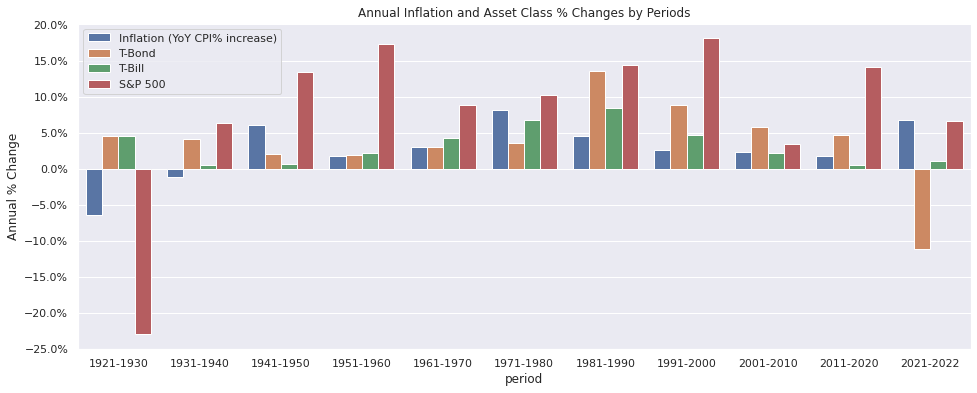

In [38]:
def plot_multibars(df, x, Y):
    df_plot = df.reset_index()[[x]+Y]
    if pd.api.types.is_datetime64_ns_dtype(df_plot[x].dtype):
        df_plot[x] = df_plot[x] - YearBegin(1)
    df_plot = df_plot.melt(x, var_name='cols', value_name='vals')
    plt.figure(figsize=(16, 6))
    sns.set_theme()
    ax = sns.barplot(x=x, y='vals', hue='cols', data=df_plot)
    return ax

ax = plot_multibars(decades, 'period', ['actual_inflation', 'tbond', 'tbill', 'sp500'])
labels = ["Inflation (YoY CPI% increase)", "T-Bond", "T-Bill", "S&P 500"]
legend = ax.legend()
for i, l in enumerate(labels):
    legend.texts[i].set_text(l)
ax.set_title("Annual Inflation and Asset Class % Changes by Periods")
ax.set_ylabel('Annual % Change')
ax.yaxis.set_major_locator(mtick.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1));

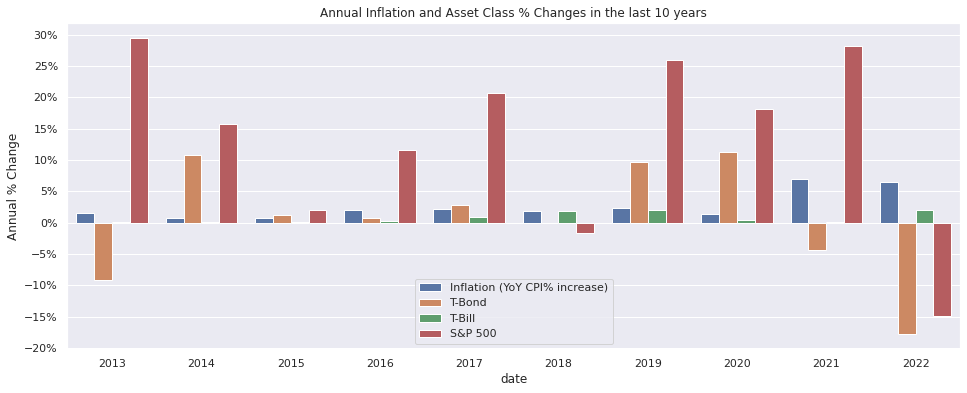

In [39]:
ax = plot_multibars(df.tail(10), 'date', ['actual_inflation', 'tbond', 'tbill', 'sp500'])
labels = ["Inflation (YoY CPI% increase)", "T-Bond", "T-Bill", "S&P 500"]
legend = ax.legend()
for i, l in enumerate(labels):
    legend.texts[i].set_text(l)
x_labels = [pd.to_datetime(tick.get_text()).year for tick in ax.get_xticklabels()]
ax.set_xticklabels(x_labels)
ax.set_ylabel('Annual % Change')
ax.set_title("Annual Inflation and Asset Class % Changes in the last 10 years")
ax.yaxis.set_major_locator(mtick.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1));

*Answer to research question:* **The plot above highlights how bad 2022 was for investors. Both the Treasury Bonds and S&P 500 had a double-digit drop. Put it another way, though, the bonds were heavily undervalued and it was a good time to get high yield T.Bonds. The inflation-adjusted T.Bills were unaffected, just like in most years.**

*Research question 2:* **How do the T.Bond, T.Bill, and S&P 500 returns correlate against inflation?**

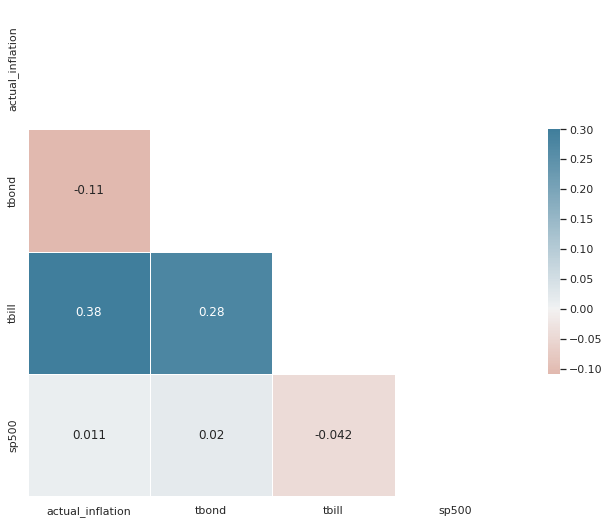

In [40]:
corr = df[['actual_inflation', 'tbond', 'tbill', 'sp500']].corr()
sns.set_theme(style="white")
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True);

*Answer to research question:* **The higher the correlation, the safer an asset is from high inflations. As we see from the correlation plot, T.Bond is not necessarily a safe haven against high inflation. Treasury Bills, them being inflation-adjusted, is safer in this case (but at what cost? Their annual returns are very low as we have seen earlier)**

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* **If I had more time, I'd add more asset classes, like gold, real assets, and cryptocurrencies.**

**Also, in this analysis, I have annualized all asset class changes, but they are not necessarily accurate when plotted against 10-year periods. For example, the changes in stock prices would have been really volatile that it would be best to just get the % increase during these 10 years. If I had more time, I would add another data quality clean-up to cater to setting up % change in 10 years.**

**Another research question I would like to explore is how all these variables that we have analyzed differ in each recession period. In fact, I have added **